# Modelos de ML

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# Lendo a base de dados com as variáveis dummies

dados = pd.read_csv('../../dados/dados_OneHotEncoder.csv')
dados.head()

,usableAreas,bedrooms,bathrooms,parkingSpaces,suites,yearlyIptu,monthlyCondoFee,price,unitTypes_APARTMENT,unitTypes_BUILDING,...,unitTypes_KITNET,unitTypes_LOFT,unitTypes_PENTHOUSE,unitTypes_RESIDENTIAL_ALLOTMENT_LAND,unitTypes_RESIDENTIAL_BUILDING,unitTypes_TWO_STORY_HOUSE,unitTypes_VILLAGE_HOUSE,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,5.017280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.160804,0,0,...,0,0,0,1,0,0,0,0,1,0
1,3.761200,1.098612,0.693147,0.000000,0.000000,4.615121,5.993961,9.825580,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.871201,1.098612,1.098612,0.000000,0.693147,5.247024,6.214608,9.680406,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3.761200,1.098612,0.693147,0.000000,0.000000,4.615121,5.993961,9.705098,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.737670,1.098612,0.693147,0.693147,0.000000,0.000000,0.000000,9.852247,1,0,...,0,0,0,0,0,0,0,0,1,0


## Dividindo em treino e teste

In [3]:
X = dados.drop('price', axis=1)
y = dados['price']

In [4]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, )

## Regressão linear

In [5]:
import statsmodels.api as sm

X_train_constante = sm.add_constant(X_train)
X_train_constante

/home/bruno/anaconda3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/bruno/anaconda3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/bruno/anaconda3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,const,usableAreas,bedrooms,bathrooms,parkingSpaces,suites,yearlyIptu,monthlyCondoFee,unitTypes_APARTMENT,unitTypes_BUILDING,...,unitTypes_KITNET,unitTypes_LOFT,unitTypes_PENTHOUSE,unitTypes_RESIDENTIAL_ALLOTMENT_LAND,unitTypes_RESIDENTIAL_BUILDING,unitTypes_TWO_STORY_HOUSE,unitTypes_VILLAGE_HOUSE,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
919,1.0,3.891820,1.098612,0.693147,0.000000,0.000000,0.000000,0.000000,1,0,...,0,0,0,0,0,0,0,1,0,0
55028,1.0,6.908755,1.609438,1.609438,1.609438,1.609438,7.601402,7.666222,0,0,...,0,0,0,0,0,0,0,0,1,0
7555,1.0,4.465908,1.098612,0.693147,0.693147,1.098612,7.117206,6.741701,1,0,...,0,0,0,0,0,0,0,0,1,0
26610,1.0,5.003946,1.386294,1.609438,1.098612,1.098612,0.693147,0.693147,1,0,...,0,0,0,0,0,0,0,0,1,0
9426,1.0,4.709530,1.386294,0.693147,1.098612,0.000000,7.244942,5.860786,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,1.0,5.605802,1.609438,0.693147,1.386294,1.098612,6.498282,7.744570,0,0,...,0,0,1,0,0,0,0,0,1,0
54343,1.0,6.418365,1.609438,2.079442,1.609438,1.609438,9.893488,8.505323,1,0,...,0,0,0,0,0,0,0,0,1,0
38158,1.0,5.398163,1.609438,1.386294,1.098612,0.693147,5.303305,5.860786,0,0,...,0,0,0,0,0,0,0,0,1,0
860,1.0,5.579730,0.000000,0.000000,0.000000,0.000000,0.000000,4.852030,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
import statsmodels.api as sm

X_train_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst=True).fit()
print(modelo_statsmodels.summary)

/home/bruno/anaconda3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f49e3cd9730>>


In [7]:
# step wise regression -> Sugestão do João

modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     6783.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:42:52   Log-Likelihood:                -20007.
No. Observations:               38615   AIC:                         4.006e+04
Df Residuals:                   38590   BIC:                         4.028e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [8]:
reg_linear = LinearRegression(n_jobs=-1).fit(X_train, y_train)

Criando uma função para obter as métricas dos modelos de regressão como um DataFrame.

* R2: Coeficiente de determinação

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Onde: 

$\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$

$\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$

* MAE: Mean Absolute Error

$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$$

* MSE: Mean Squared Error

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$$

* RMSE: Root Mean Squared Error

$$\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2} = \sqrt{MSE}$$

In [9]:
# Criando um dicionário com as métricas para usar em um dataframe

def df_metrics_regression(modelo, X_test, y_test):
    mae = metrics.mean_absolute_error(y_test, modelo.predict(X_test))
    mse = metrics.mean_squared_error(y_test, modelo.predict(X_test))
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, modelo.predict(X_test))
    return pd.DataFrame({'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'R2': [r2]})

In [10]:
metricas_reg_linear = df_metrics_regression(reg_linear, X_test, y_test)
metricas_reg_linear

,MAE,MSE,RMSE,R2
0,0.309014,0.168874,0.410943,0.805057


## [Regressor da Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


Vamos utilizar a validação cruzada para avaliarmos obtermos um valor mais generalista para o nosso modelo.

<center><img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500" height="400"></center>


In [11]:
dtr = DecisionTreeRegressor(random_state=SEED, max_depth=5)
cross_val_score(dtr, X_train, y_train, cv=5, scoring = 'neg_root_mean_squared_error').mean()

-0.4110571323656762

Ou seja, dividindo o conjunto de dados em 5 folds e calculando a média dos resultados obtemos um valor de -0.5211 para o valor de RMSE.

Mas porque o valor é negativo? Segundo o livro "[Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems](https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=asc_df_1492032646/?tag=googleshopp00-20&linkCode=df0&hvadid=379733272930&hvpos=&hvnetw=g&hvrand=2914861088408220993&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9074298&hvtargid=pla-523968811896&psc=1)":

> Why negative? Because a predictor’s score() method must always respect Scikit-Learn’s “greater is better” rule: if a predictor is better than another, its score() method should return a greater score.

> Tradução: Por que negativa? porque o método score() de um preditor deve sempre respeitar a regra "maior é melhor" da Scikit-Learn: se um preditor é melhor que outro, o seu score() deve retornar um score maior.

Vamos analisar como o modelo se comporta para o conjunto de dados separados para teste.

In [12]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [13]:
metricas_dt_reg = df_metrics_regression(dtr, X_test, y_test)
metricas_dt_reg

,MAE,MSE,RMSE,R2
0,0.310463,0.174748,0.418029,0.798276


### Visualizando gráfico dos resíduos

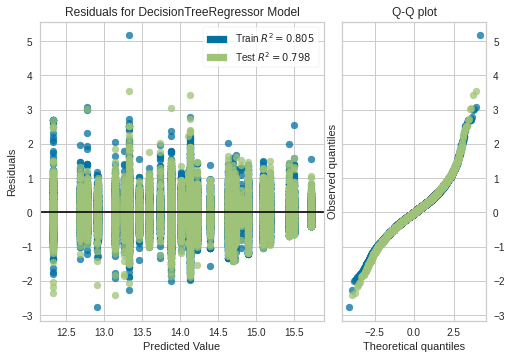

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(dtr, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Visualizando gráfico de erro

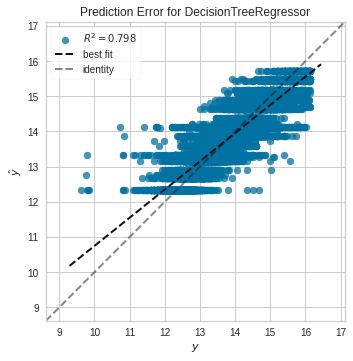

In [15]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(dtr, X_train, y_train, X_test, y_test)

## [Regressor de Floresta Aleatória](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

![](https://miro.medium.com/max/1400/0*f_qQPFpdofWGLQqc.png)

Realizando a mesma análise para o modelo de árvore aleatória:

In [16]:
rf_reg = RandomForestRegressor(max_depth=5, random_state=SEED)
cross_val_score(rf_reg, X_train, y_train, cv=5, scoring = 'neg_root_mean_squared_error').mean()

-0.39761051725895513

In [17]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [18]:
metricas_rf_reg = df_metrics_regression(rf_reg, X_test, y_test)
metricas_rf_reg

,MAE,MSE,RMSE,R2
0,0.30041,0.163799,0.404721,0.810915


### Visualizando a importância das features

### Visualizando gráfico dos resíduos

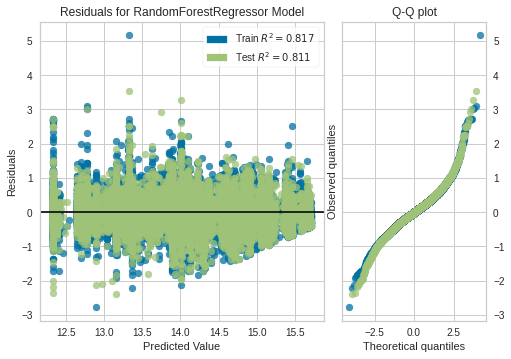

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(rf_reg, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Visualizando gráfico de erro

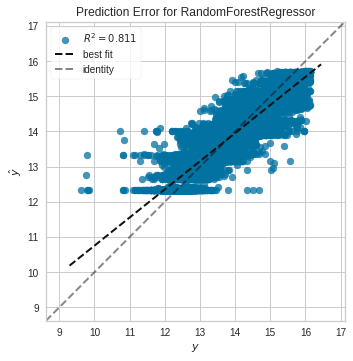

In [20]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(rf_reg, X_train, y_train, X_test, y_test)

## Gradient Boosting Regressor

Para entender como o Boosting funciona conferir este [link](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/).

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=SEED, max_depth=5)
cross_val_score(reg, X_train, y_train, cv=5, scoring = 'neg_root_mean_squared_error').mean()


-0.3115198136835434

In [22]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [23]:
metricas_gbr_reg = df_metrics_regression(reg, X_test, y_test)
metricas_gbr_reg

,MAE,MSE,RMSE,R2
0,0.229588,0.09666,0.310901,0.888419


## Analisando os resultados dos modelos:

In [24]:
metricas_modelos = pd.concat([metricas_reg_linear.T, metricas_dt_reg.T, metricas_rf_reg.T, metricas_gbr_reg.T], axis=1)
metricas_modelos.columns = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
metricas_modelos.head()

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
MAE,0.309014,0.310463,0.300410,0.229588
MSE,0.168874,0.174748,0.163799,0.096660
RMSE,0.410943,0.418029,0.404721,0.310901
R2,0.805057,0.798276,0.810915,0.888419


Logo o modelo que apresentou melhor desempenho foi o modelo de Gradient Boosting Regressor, por isso vamos realizar o tunning dos parâmetros para obter um melhor resultado.

## Tunning Hyperparameters Gradient Boosting Regressor

In [25]:
learning_rate = [0.01, 0.1]
n_estimators = [int(x) for x in np.linspace(100, 200, num=4, dtype=int)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num=4, dtype=int)]
max_depth = [int(x) for x in np.linspace(8, 20, num=4, dtype=int)]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'learning_rate': learning_rate}

param_grid

{'n_estimators': [100, 133, 166, 200],
 'max_depth': [8, 12, 16, 20],
 'min_samples_split': [2, 4, 7, 10],
 'learning_rate': [0.01, 0.1]}

Essa otimização pode demorar um pouco, cerca de 60min.

In [26]:
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingRegressor(random_state=SEED)

clf = GridSearchCV(gbc, param_grid, cv=3, verbose=2, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=100 
[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=133 
[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=133 
[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=100 
[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=133 
[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=100 
[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=166 
[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=166 
[CV]  learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=100, total=  46.2s
[CV]  learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=100, total=  46.8s
[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=166 
[CV] learning_rate=0.01, max_depth=8, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=8, min_sam

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.3min


[CV] learning_rate=0.01, max_depth=8, min_samples_split=7, n_estimators=166 
[CV]  learning_rate=0.01, max_depth=8, min_samples_split=4, n_estimators=200, total= 1.6min
[CV] learning_rate=0.01, max_depth=8, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=8, min_samples_split=7, n_estimators=100, total=  53.1s
[CV] learning_rate=0.01, max_depth=8, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=8, min_samples_split=7, n_estimators=133, total= 1.1min
[CV] learning_rate=0.01, max_depth=8, min_samples_split=7, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=8, min_samples_split=7, n_estimators=133, total= 1.1min
[CV] learning_rate=0.01, max_depth=8, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=8, min_samples_split=7, n_estimators=133, total= 1.2min
[CV] learning_rate=0.01, max_depth=8, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=8, min_samples_split=7, n_estimators=166

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 24.8min


[CV]  learning_rate=0.01, max_depth=16, min_samples_split=10, n_estimators=200, total= 1.6min
[CV] learning_rate=0.01, max_depth=20, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=20, min_samples_split=2, n_estimators=133, total= 1.3min
[CV] learning_rate=0.01, max_depth=20, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=20, min_samples_split=2, n_estimators=133, total= 1.3min
[CV] learning_rate=0.01, max_depth=20, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=20, min_samples_split=2, n_estimators=133, total= 1.4min
[CV] learning_rate=0.01, max_depth=20, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=20, min_samples_split=2, n_estimators=166, total= 1.6min
[CV] learning_rate=0.01, max_depth=20, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=20, min_samples_split=2, n_estimators=166, total= 1.6min
[CV] learning_rate=0.01, max_depth=20, min_samples_

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 54.6min


[CV]  learning_rate=0.1, max_depth=20, min_samples_split=4, n_estimators=100, total=  58.5s
[CV] learning_rate=0.1, max_depth=20, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=20, min_samples_split=2, n_estimators=200, total= 2.2min
[CV] learning_rate=0.1, max_depth=20, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=20, min_samples_split=4, n_estimators=133, total= 1.4min
[CV] learning_rate=0.1, max_depth=20, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=20, min_samples_split=4, n_estimators=133, total= 1.4min
[CV] learning_rate=0.1, max_depth=20, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=20, min_samples_split=4, n_estimators=133, total= 1.4min
[CV] learning_rate=0.1, max_depth=20, min_samples_split=7, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=20, min_samples_split=4, n_estimators=166, total= 1.7min
[CV] learning_rate=0.1, max_depth=20, min_samples_split=7, n_es

[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed: 61.2min finished


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [2, 4, 7, 10],
                         'n_estimators': [100, 133, 166, 200]},
             verbose=2)

In [32]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
71,59.628377,0.980771,0.329477,0.063627,0.1,8,4,200,"{'learning_rate': 0.1, 'max_depth': 8, 'min_sa...",0.903676,0.899520,0.902885,0.902027,0.001802,1
75,62.029087,3.023923,0.297444,0.002653,0.1,8,7,200,"{'learning_rate': 0.1, 'max_depth': 8, 'min_sa...",0.902565,0.899910,0.903207,0.901894,0.001427,2
67,61.010790,1.713300,0.346546,0.063453,0.1,8,2,200,"{'learning_rate': 0.1, 'max_depth': 8, 'min_sa...",0.902905,0.899947,0.902765,0.901873,0.001362,3
70,50.372194,0.294941,0.309607,0.068296,0.1,8,4,166,"{'learning_rate': 0.1, 'max_depth': 8, 'min_sa...",0.903327,0.899202,0.902591,0.901707,0.001796,4
79,59.124486,0.825531,0.277680,0.010965,0.1,8,10,200,"{'learning_rate': 0.1, 'max_depth': 8, 'min_sa...",0.902257,0.900328,0.902395,0.901660,0.000944,5


In [31]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_split': 4,
 'n_estimators': 200}

## Treinando o melhor modelo para produção

In [34]:
gbc_final = GradientBoostingRegressor(random_state=SEED, **clf.best_params_)

In [47]:
gbc_final.fit(X, y)  # treinando com todos os dados

GradientBoostingRegressor(max_depth=8, min_samples_split=4, n_estimators=200,
                          random_state=42)

## Salvando o modelo para deploy

In [49]:
import pickle
with open('../../modelo/house_prices_rj_gbc.pkl', 'wb') as file:
    pickle.dump(gbc_final, file)

> Obs: Os valores ainda estão na escala logarítmica, portanto para realizar a previsão real temos que fazer o exponencial.

## Carregando o modelo

In [51]:
with open('../../modelo/house_prices_rj_gbc.pkl', 'rb') as f:
    modelo_pkl = pickle.load(f)

In [53]:
np.expm1(modelo_pkl.predict(X_test)) ## predições do X_test

array([3537007.31441175,  637550.29967828, 3297310.2008787 , ...,
        717688.87258169, 1127066.55631518, 1161518.66974528])

Outras dicas de como salvar e carregar o modelo podes ser encontradas na documentação do sklearn "[9. Model persistence](https://scikit-learn.org/stable/model_persistence.html)".

Prontinho agora é só realizar o deploy do modelo serializado.

## Próximos passos:

* Realizar o deploy com o mlflow e dockers
* Tentar fazer o deploy do melhor modelo otimizado.
* Criar um README (Em andamento)
